# Collaboration


## Form a team

Now we're going to get to the most important question of all with Git and GitHub: working with others.

Organise into pairs. You're going to be working on the website of one of the two of you, together, so decide who is going to be the leader, and who the collaborator.


## Giving permission

The leader needs to let the collaborator have the right to make changes to his code.

In GitHub, go to `Settings` on the right, then `Collaborators & teams` on the left.

Add the user name of your collaborator to the box. They now have the right to push to your repository.


## Obtaining a colleague's code

Next, the collaborator needs to get a copy of the leader's code. For this example notebook,
I'm going to be collaborating with myself, swapping between my two repositories.
Make yourself a space to put it your work. (I will have two)


In [1]:
import os

top_dir = os.getcwd()
git_dir = os.path.join(top_dir, "learning_git")
working_dir = os.path.join(git_dir, "git_example")
os.chdir(git_dir)

In [2]:
%%bash
pwd
rm -rf github-example # cleanup after previous example
rm -rf partner_dir # cleanup after previous example

/raid/cis/yjlee/workspace/projects/lecture/book/lectures/softeng/vcs/learning_git


Next, the collaborator needs to find out the URL of the repository: they should go to the leader's repository's GitHub page, and note the URL on the top of the screen.

As before, we're using `HTTPS` to connect - to do this you'll need to make sure the `HTTS` button is pushed, and check that the URL begins with `https://github.com`.

Copy the URL into your clipboard by clicking on the icon to the right of the URL, and then:


In [3]:
%%bash
pwd
git clone https://github.com/chu-aie/github-example.git partner_dir

/raid/cis/yjlee/workspace/projects/lecture/book/lectures/softeng/vcs/learning_git


Cloning into 'partner_dir'...


In [4]:
partner_dir = os.path.join(git_dir, "partner_dir")
os.chdir(partner_dir)

In [5]:
%%bash
pwd
ls

/raid/cis/yjlee/workspace/projects/lecture/book/lectures/softeng/vcs/learning_git/partner_dir
lakeland.md
test.md


Note that your partner's files are now present on your disk:


In [6]:
%%bash
cat lakeland.md

Lakeland

Cumbria has some pretty hills, and lakes too

Mountains:
* Helvellyn


## Nonconflicting changes

Now, both of you should make some changes. To start with, make changes to _different_ files. This will mean your work doesn't "conflict". Later, we'll see how to deal with changes to a shared file.


Both of you should commit, but not push, your changes to your respective files:


E.g., the leader:


In [7]:
os.chdir(working_dir)

In [8]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Yr Wyddfa

Writing Wales.md


In [9]:
%%bash
ls

lakeland.md
test.md
Wales.md


In [10]:
%%bash
git add Wales.md
git commit -m "Add wales"

[main 046a712] Add wales
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


And the partner:


In [11]:
os.chdir(partner_dir)

In [12]:
%%writefile Scotland.md
Mountains In Scotland
==================

* Ben Eighe
* Cairngorm

Writing Scotland.md


In [13]:
%%bash
ls

lakeland.md
Scotland.md
test.md


In [14]:
%%bash
git add Scotland.md
git commit -m "Add Scotland"

[main 5524925] Add Scotland
 1 file changed, 5 insertions(+)
 create mode 100644 Scotland.md


One of you should now push with `git push`:


In [15]:
%%bash
git push

To https://github.com/chu-aie/github-example.git
   4fa39c8..5524925  main -> main


## Rejected push


The other should then attempt to push, but should receive an error message:


In [16]:
os.chdir(working_dir)

In [17]:
%%bash
git push || echo "Push failed"

To https://github.com/chu-aie/github-example.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/chu-aie/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


Push failed


Do as it suggests:


In [18]:
%%bash
git pull

From https://github.com/chu-aie/github-example
   4fa39c8..5524925  main       -> origin/main
Successfully rebased and updated refs/heads/main.


## Merge commits

A window may pop up with a suggested default commit message. This commit is special: it is a _merge_ commit. It is a commit which combines your collaborator's work with your own.


Now, push again with `git push`. This time it works. If you look on GitHub, you'll now see that it contains both sets of changes.


In [19]:
%%bash
git push

To https://github.com/chu-aie/github-example.git
   5524925..54fa40f  main -> main


The partner now needs to pull down that commit:


In [20]:
os.chdir(partner_dir)

In [21]:
%%bash
git pull

From https://github.com/chu-aie/github-example
   5524925..54fa40f  main       -> origin/main


Updating 5524925..54fa40f
Fast-forward
 Wales.md | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


In [22]:
%%bash
ls

lakeland.md
Scotland.md
test.md
Wales.md


## Nonconflicted commits to the same file

Go through the whole process again, but this time, both of you should make changes to a single file, but make sure that you don't touch the same _line_. Again, the merge should work as before:


In [23]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Snowdon

Overwriting Wales.md


In [24]:
%%bash
git diff

diff --git a/Wales.md b/Wales.md
index f3e88b4..90f23ec 100644
--- a/Wales.md
+++ b/Wales.md
@@ -2,4 +2,4 @@ Mountains In Wales
 
 * Tryfan
-* Yr Wyddfa
+* Snowdon


In [25]:
%%bash
git commit -am "Translating from the Welsh"

[main ce8bddc] Translating from the Welsh
 1 file changed, 1 insertion(+), 1 deletion(-)


In [26]:
%%bash
git log --oneline

ce8bddc Translating from the Welsh
54fa40f Add wales
5524925 Add Scotland
4fa39c8 Add Helvellyn
d2b4434 Include lakes in the scope
b943bed Add lakeland
9793609 Revert "Add a lie about a mountain"
6626d56 Change title
453f5bc Add a lie about a mountain
74efc42 First commit of discourse on UK topography


In [27]:
os.chdir(working_dir)

In [28]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Yr Wyddfa

Overwriting Wales.md


In [29]:
%%bash
git commit -am "Add a beacon"

[main ac80a2f] Add a beacon
 1 file changed, 1 insertion(+)


In [30]:
%%bash
git log --oneline

ac80a2f Add a beacon
54fa40f Add wales
5524925 Add Scotland
4fa39c8 Add Helvellyn
d2b4434 Include lakes in the scope
b943bed Add lakeland
9793609 Revert "Add a lie about a mountain"
6626d56 Change title
453f5bc Add a lie about a mountain
74efc42 First commit of discourse on UK topography


In [31]:
%%bash
git push

To https://github.com/chu-aie/github-example.git
   54fa40f..ac80a2f  main -> main


Switching back to the other partner...


In [32]:
os.chdir(partner_dir)

In [33]:
%%bash
git push || echo "Push failed"

To https://github.com/chu-aie/github-example.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/chu-aie/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


Push failed


In [34]:
%%bash
git pull

From https://github.com/chu-aie/github-example
   54fa40f..ac80a2f  main       -> origin/main
Successfully rebased and updated refs/heads/main.


In [35]:
%%bash
git push

To https://github.com/chu-aie/github-example.git
   ac80a2f..b101602  main -> main


In [36]:
%%bash
git log --oneline --graph

* b101602 Translating from the Welsh
* ac80a2f Add a beacon
* 54fa40f Add wales
* 5524925 Add Scotland
* 4fa39c8 Add Helvellyn
* d2b4434 Include lakes in the scope
* b943bed Add lakeland
* 9793609 Revert "Add a lie about a mountain"
* 6626d56 Change title
* 453f5bc Add a lie about a mountain
* 74efc42 First commit of discourse on UK topography


In [37]:
os.chdir(working_dir)

In [38]:
%%bash
git pull

From https://github.com/chu-aie/github-example
   ac80a2f..b101602  main       -> origin/main


Updating ac80a2f..b101602
Fast-forward
 Wales.md | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [39]:
%%bash
git log --graph --oneline

* b101602 Translating from the Welsh
* ac80a2f Add a beacon
* 54fa40f Add wales
* 5524925 Add Scotland
* 4fa39c8 Add Helvellyn
* d2b4434 Include lakes in the scope
* b943bed Add lakeland
* 9793609 Revert "Add a lie about a mountain"
* 6626d56 Change title
* 453f5bc Add a lie about a mountain
* 74efc42 First commit of discourse on UK topography


```{mermaid}
:align: center

sequenceDiagram
  participant S as Sue
  participant SR as Sue's repo
  participant M as Shared remote
  participant JR as Jim's repo
  participant J as Jim

  Note over S: git clone
  M->>SR: Fetch commits
  SR->>S: Working directory as at latest commit

  Note over S: Edit Scotland.md
  Note over J: Edit Wales.md

  Note over S: git commit -am "Add Scotland"
  S->>SR: Create commit with Scotland file

  Note over J: git commit -am "Add Wales"
  J->>JR: Create commit with Wales file

  Note over S: git push
  SR->>M: Update remote with changes

  Note over J: git push
  JR-xM: !Rejected change

  Note over J: git pull
  M->>JR: Pull in Sue's last commit, merge histories
  JR->>J: Add Scotland.md to working directory

  Note over J: git push
  JR->>M: Transfer merged history to remote

```


## Conflicting commits

Finally, go through the process again, but this time, make changes which touch the same line.


In [40]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Fan y Big

Overwriting Wales.md


In [41]:
%%bash
git commit -am "Add another Beacon"
git push

[main e5451fd] Add another Beacon
 1 file changed, 1 insertion(+)


To https://github.com/chu-aie/github-example.git
   b101602..e5451fd  main -> main


In [42]:
os.chdir(partner_dir)

In [43]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr

Overwriting Wales.md


In [44]:
%%bash
git commit -am "Add Glyder"

[main 0928826] Add Glyder
 1 file changed, 1 insertion(+)


In [45]:
%%bash
git push || echo "Push failed"

To https://github.com/chu-aie/github-example.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/chu-aie/github-example.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


Push failed


When you pull, instead of offering an automatic merge commit message, it says:


In [46]:
%%bash
git pull || echo "Pull failed"

From https://github.com/chu-aie/github-example
   b101602..e5451fd  main       -> origin/main


Auto-merging Wales.md
CONFLICT (content): Merge conflict in Wales.md


error: could not apply 0928826... Add Glyder
hint: Resolve all conflicts manually, mark them as resolved with
hint: "git add/rm <conflicted_files>", then run "git rebase --continue".
hint: You can instead skip this commit: run "git rebase --skip".
hint: To abort and get back to the state before "git rebase", run "git rebase --abort".
Could not apply 0928826... Add Glyder


Pull failed


## Resolving conflicts

Git couldn't work out how to merge the two different sets of changes.

You now need to manually resolve the conflict.

It has marked the conflicted area:


In [47]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
<<<<<<< HEAD
* Fan y Big
* Glyder Fawr
>>>>>>> 0928826 (Add Glyder)


Manually edit the file, to combine the changes as seems sensible and get rid of the symbols:


In [48]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Fan y Big
* Glyder Fawr

Overwriting Wales.md


## Commit the resolved file

Now commit the merged result:


In [49]:
%%bash
git commit -a --no-edit # added a No-edit for this non-interactive session. You can edit the commit if you like.

[detached HEAD cc360cb] Add Glyder
 1 file changed, 1 insertion(+)


In [54]:
%%bash
git push origin HEAD:main

To https://github.com/chu-aie/github-example.git
   e5451fd..cc360cb  HEAD -> main


In [55]:
os.chdir(working_dir)

In [56]:
%%bash
git pull

From https://github.com/chu-aie/github-example
   e5451fd..cc360cb  main       -> origin/main


Updating e5451fd..cc360cb
Fast-forward
 Wales.md | 1 +
 1 file changed, 1 insertion(+)


In [57]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
* Fan y Big
* Glyder Fawr


In [58]:
%%bash
git log --oneline --graph

* cc360cb Add Glyder
* e5451fd Add another Beacon
* b101602 Translating from the Welsh
* ac80a2f Add a beacon
* 54fa40f Add wales
* 5524925 Add Scotland
* 4fa39c8 Add Helvellyn
* d2b4434 Include lakes in the scope
* b943bed Add lakeland
* 9793609 Revert "Add a lie about a mountain"
* 6626d56 Change title
* 453f5bc Add a lie about a mountain
* 74efc42 First commit of discourse on UK topography


## Distributed VCS in teams with conflicts


```{mermaid}
:align: center

sequenceDiagram
  participant S as Sue
  participant SR as Sue's repo
  participant M as Shared remote
  participant JR as Jim's repo
  participant J as Jim

  Note over S: Edit the same line in wales.md
  Note over J: Edit the same line in wales.md

  Note over S: git commit -am "update wales.md"
  S->>SR: Add commit to local repo

  Note over J: git commit -am "update wales.md"
  J->>JR: Add commit to local repo

  Note over S: git push
  SR->>M: Transfer commit to remote

  Note over J: git push
  JR-xM: !Rejected

  Note over J: git pull
  M->>J: Make conflicted file with conflict markers

  Note over J: Edit file to resolve conflicts
  Note over J: git add wales.md
  Note over J: git commit
  J->>JR: Mark conflict as resolved

  Note over J: git push
  JR->>M: Transfer merged history to remote

  Note over S: git pull
  M->>SR: Download Jim's resolution of conflict

```


# The Levels of Git


```{mermaid}
:align: center

sequenceDiagram
  participant WD as Working Directory
  participant SA as Staging Area
  participant LR as Local Repository
  participant RR as Remote Repository

  Note over WD: git add
  WD->>SA: Stage changes

  Note over SA: git commit
  SA->>LR: Commit staged changes

  Note over LR: git commit -a
  LR->>LR: Stage and commit changes

  Note over LR: git checkout
  LR->>WD: Update to specified state

  Note over LR: git reset
  LR->>SA: Reset staging area to commit

  Note over LR: git reset --hard
  LR->>WD: Reset to commit & update files

  Note over LR: git push
  LR->>RR: Push changes to remote

  Note over RR: git fetch
  RR->>LR: Fetch updates from remote

  Note over LR: git merge
  LR->>WD: Merge fetched changes

  Note over RR: git pull
  RR->>WD: Fetch and merge changes

```


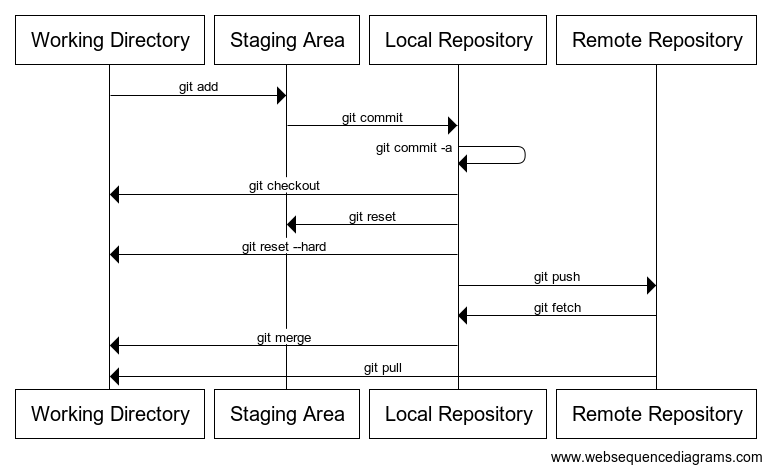

In [57]:
message = """
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Local Repository -> Local Repository : git commit -a
Local Repository -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
Local Repository -> Remote Repository : git push
Remote Repository -> Local Repository : git fetch
Local Repository -> Working Directory : git merge
Remote Repository -> Working Directory: git pull
"""

wsd(message)

## Editing directly on GitHub

Note that you can also make changes in the GitHub website itself. Visit one of your files, and hit "edit".

Make a change in the edit window, and add an appropriate commit message.

That change now appears on the website, but not in your local copy. (Verify this).


Now pull, and check the change is now present on your local version.


## GitHub as a social network

In addition to being a repository for code, and a way to publish code, GitHub is a social network.

You can follow the public work of other coders: go to the profile of your collaborator in your browser, and hit the "follow" button.

[Here's mine](https://github.com/entelecheia) : if you want to you can follow me.

Using GitHub to build up a good public profile of software projects you've worked on is great for your CV!
